<img src="https://miro.medium.com/max/647/1*ZOcUPrSXLYucFxppoI-dYg.png">

# Problem definition


For this project we are using a car dataset, where we want to predict the selling price of car based on its certain features. 
Since we need to find the real value, with real calculation, therefore this problem is regression problem. 
We will be using linear regression to solve this problem. This dataset contains information about used cars listed on www.cardekho.com. 


### Data description 
- **Car_Name:** Name of the car
- **Year:** Production Year
- **Selling_Price:** Selling price
- **Present_Price:** Present buying price
- **Kms_Driven:** Kilometers driven value
- **Fuel_Type:** Fuel type
- **Seller_Type:** Seller Type
- **Transmission:** Transmission Type
- **Owner:** Ownership status (1 = yes, 0 = no)

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Gathering

In [2]:
df  = pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Preparation

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


In [7]:
r = len(df.columns[1:])//2+ 1*(len(df.columns[1:])%2==1)
c = 2
r,c

(4, 2)

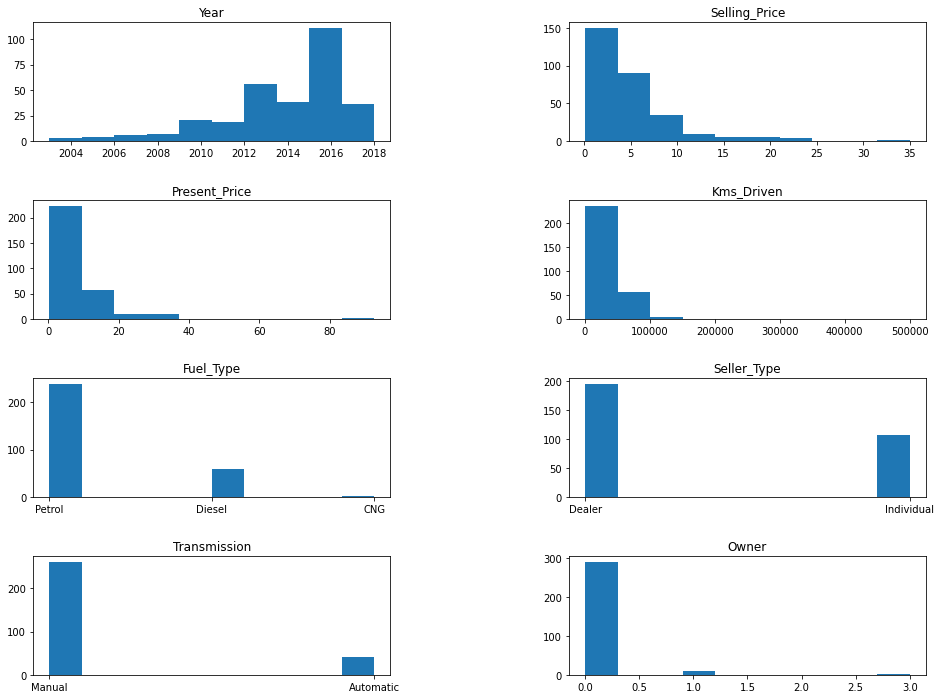

In [8]:
fig, ax = plt.subplots(nrows=r,ncols=c, figsize=(16,12))
fig.subplots_adjust(left=None,    bottom=None,    right=None,    top=None,    wspace=0.5,    hspace=0.5)

for i,col in enumerate(df.columns[1:]):
    ax[i//2,i%2].hist(df[col])
    ax[i//2,i%2].set_title(col)

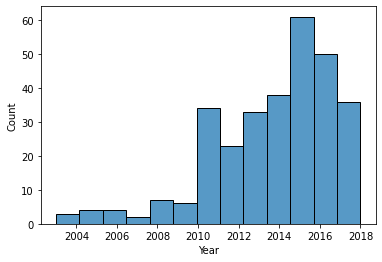

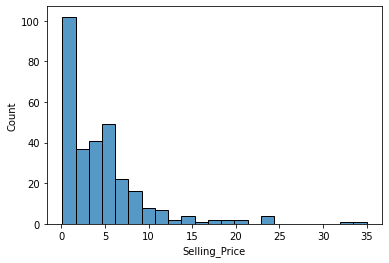

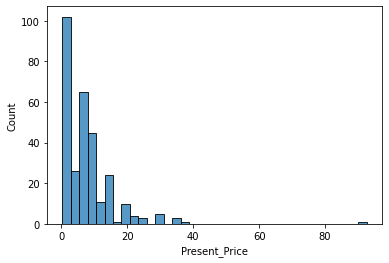

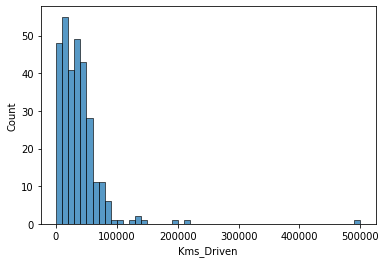

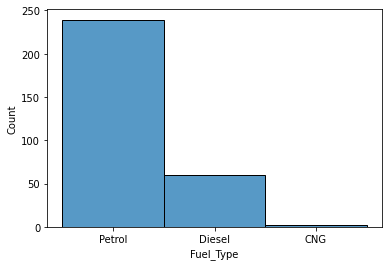

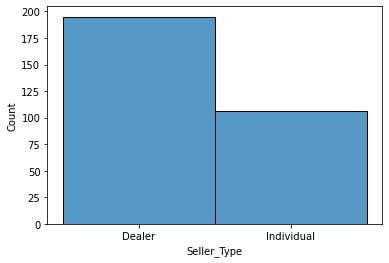

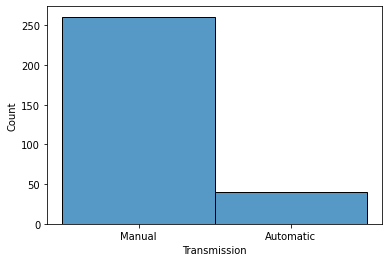

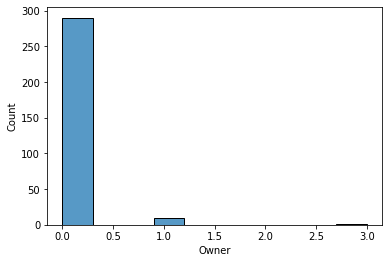

In [9]:
for i,col in enumerate(df.columns[1:]):
    plt.figure(i)
    sns.histplot(df[col])

In [10]:
df.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [11]:
plt.rcParams["figure.figsize"] = (9,5)

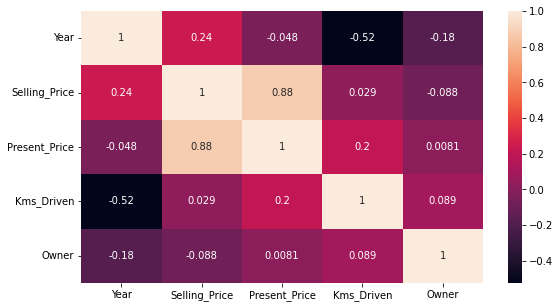

In [12]:
sns.heatmap(df.corr(), annot=True);

In [13]:
cols = list(df.iloc[:,1:].select_dtypes(include="object").columns)
# df.info()

In [14]:
# df[(df.Selling_Price < df.Present_Price)].shape

In [15]:
df = pd.get_dummies(df,columns=["Fuel_Type","Seller_Type","Transmission"], drop_first=True,)

In [16]:
df["car_age"] = 2018-df["Year"]

In [17]:
df.drop(["Car_Name","Year"],axis=1,inplace=True)

In [18]:
df.shape

(301, 9)

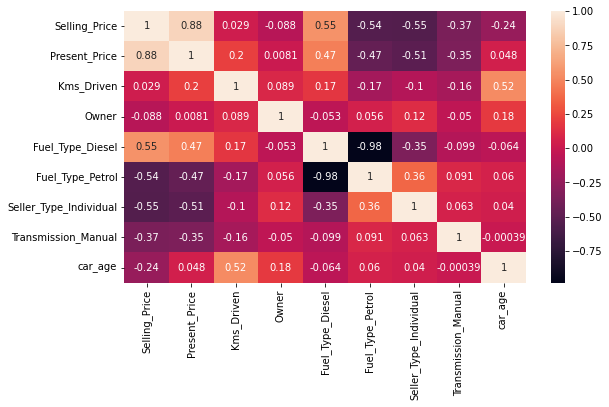

In [19]:
sns.heatmap(df.corr(), annot=True);

In [20]:
# sns.pairplot(df);

# Feature Engineering

<ul>Fuel_Type feature:
    <li>Fuel is Petrol if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 1</li>
    <li>Fuel is Diesel if Fuel_type_diesel = 1 ,Fuel_Type_Petrol = 0</li>
    <li>Fuel is cng if Fuel_type_diesel = 0 ,Fuel_Type_Petrol = 0</li>
   </ul>
<ul>Transmission feature:
    <li>transmission is manual if Transmission_Manual = 1</li> 
    <li>transmission is automatic if Transmission_Manual = 0</li></ul>
<ul>Seller_Type feature:
    <li>Seller_Type is Individual if Seller_Type_Individual = 1 </li> 
    <li>Seller_Type is dealer if Seller_Type_Individual = 0</li> </ul>
    


### Features and target variable

In [21]:
X = df.drop(["Selling_Price"],axis=1)
y= df["Selling_Price"]


### Splitting data into training and testing

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2, random_state=42)


In [24]:
# X_train,X_test,y_train,y_test
X_train.shape

(240, 8)

##  Model Building (Linear Regression)

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
lr_model = LinearRegression(normalize=True) # 
lr_model.fit(X_train,y_train)

lr_model.score(X_train,y_train), lr_model.score(X_test,y_test)

c:\Users\hakan\anaconda3\envs\pythonProject\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(0.8886517300804564, 0.8489813024899066)

# Interpret the model

In [27]:
pd.DataFrame(lr_model.coef_,X_train.columns, columns=["Coefs_"])

,Coefs_
Present_Price,0.429153
Kms_Driven,-0.000006
Owner,-0.903760
Fuel_Type_Diesel,2.533273
Fuel_Type_Petrol,0.738464
Seller_Type_Individual,-1.190593
Transmission_Manual,-1.639022
car_age,-0.353801


In [28]:
for k,v in dict(zip(X_train.columns, lr_model.coef_)).items():
    print(f"{k:<20}","\t",f"{v:.3f}")

Present_Price        	 0.429
Kms_Driven           	 -0.000
Owner                	 -0.904
Fuel_Type_Diesel     	 2.533
Fuel_Type_Petrol     	 0.738
Seller_Type_Individual 	 -1.191
Transmission_Manual  	 -1.639
car_age              	 -0.354


# Model Evaluation

In [29]:
dir(lr_model)
lr_model.score(X_train,y_train),lr_model.score(X_test,y_test)

(0.8886517300804564, 0.8489813024899066)

In [30]:
y_pred = lr_model.predict(X_test)

In [31]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [32]:
def eval_model(y_test,y_pred):
    rmse=(mean_squared_error(y_test,y_pred)**.5)
    mae=mean_absolute_error(y_test,y_pred)
    R2_score=r2_score(y_test,y_pred)
    print(f"rmse:\t\t{rmse }")
    print(f"mae:\t\t{mae }")
    print(f"R2_score:\t{R2_score }")
#     return rmse, mae, R2_score

In [33]:
eval_model(y_test,y_pred)

rmse:		1.8651552135513827
mae:		1.2162256821297066
R2_score:	0.8489813024899066


In [34]:
y_pred = lr_model.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred,"residuals":y_test-y_pred})
results

,Actual,Predicted,residuals
177,0.35,2.955343,-2.605343
289,10.11,8.178939,1.931061
228,4.95,6.454273,-1.504273
198,0.15,-1.424175,1.574175
60,6.95,9.088899,-2.138899
...,...,...,...
234,5.50,4.474781,1.025219
296,9.50,8.973776,0.526224
281,2.10,1.822946,0.277054
285,7.40,7.604167,-0.204167


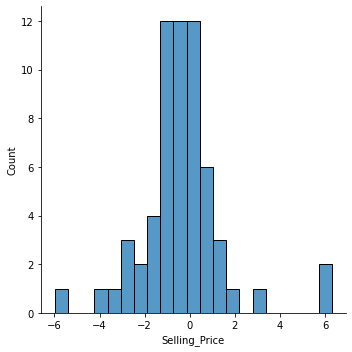

In [35]:
residuals = y_test-y_pred
sns.displot(residuals);

In [36]:
f"{len(residuals[residuals>0])} low + {len(residuals[residuals<0])} high = {len(X_test)}"

'25 low + 36 high = 61'

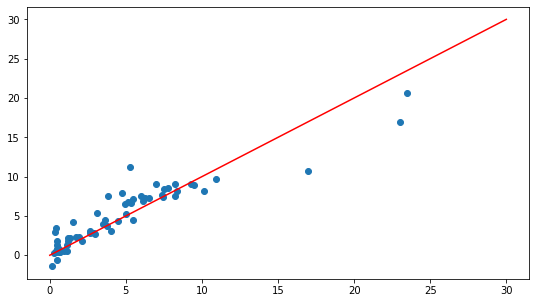

In [37]:
plt.scatter(y_test,y_pred)
plt.plot([0,30],[0,30],"r");

c:\Users\hakan\anaconda3\envs\pythonProject\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


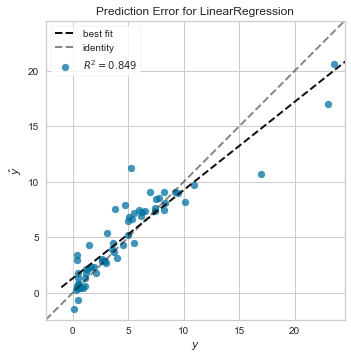

<AxesSubplot:title={'center':'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [38]:
from yellowbrick.regressor import PredictionError
# Instantiate the linear model and visualizer
lr_model= LinearRegression(normalize=True)
visualizer = PredictionError(lr_model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Regularization

# Ridge

In [39]:
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# X_train_scaled


In [41]:
ridge_model = Ridge()
ridge_model.fit(X_train_scaled,y_train)

Ridge()

In [42]:
ridge_model.score(X_train_scaled,y_train),ridge_model.score(X_test_scaled,y_test)

(0.8279940941365418, 0.7837567859000829)

In [43]:
y_pred = ridge_model.predict(X_test_scaled)

In [44]:
eval_model(y_test,y_pred)

rmse:		2.231880112223293
mae:		1.3887587019899525
R2_score:	0.7837567859000829


In [45]:
ridge_model.alpha

1.0

In [46]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.1, 20, 100),cv=10)

ridgecv_model.fit(X_train_scaled,y_train)
ridgecv_model.alpha_

0.1

In [47]:
ridgecv_model = RidgeCV(alphas=np.linspace(0.1, 1, 100),cv=10)

ridgecv_model.fit(X_train_scaled,y_train)
ridgecv_model.alpha_

0.1272727272727273

In [48]:
ridgecv_model.best_score_

0.7969708785311618

In [49]:
# y_pred_rcv = ridgecv_model.predict(X_test_scaled)
y_pred = ridgecv_model.predict(X_test_scaled)

In [50]:
eval_model(y_test,y_pred) #, ridgecv_model.score(X_train_scaled,y_train),ridgecv_model.score(X_test_scaled,y_pred_rcv)

rmse:		1.908604406586769
mae:		1.2352617252082025
R2_score:	0.8418633233450707


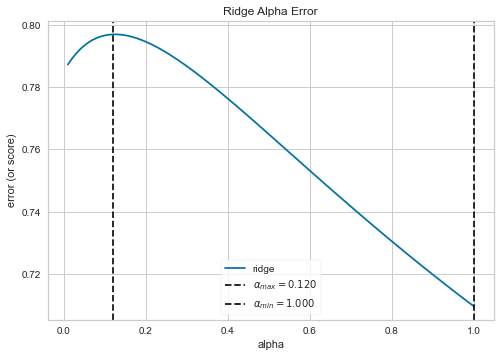

<AxesSubplot:title={'center':'Ridge Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [51]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.01, 10, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=np.linspace(0.01, 1, 100),
    cv=10
)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

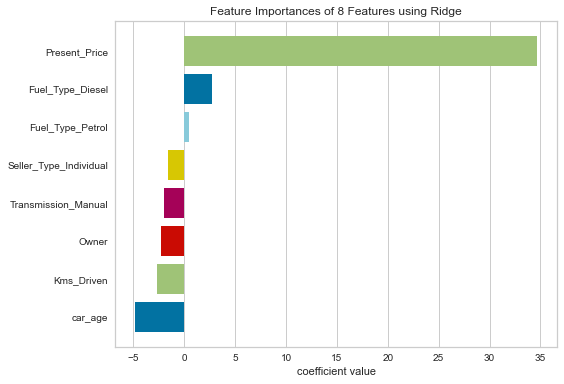

<AxesSubplot:title={'center':'Feature Importances of 8 Features using Ridge'}, xlabel='coefficient value'>

In [52]:
from yellowbrick.model_selection import FeatureImportances

model = Ridge(alpha=.18)
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show()

# Lasso

In [53]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [54]:
lasso_model = Lasso().fit(X_train,y_train)
y_pred = lasso_model.predict(X_test)
eval_model(y_test,y_pred), lasso_model.score(X_train,y_train), lasso_model.score(X_test,y_test)

rmse:		2.1541656240470655
mae:		1.4714179283504274
R2_score:	0.7985538621024054


(None, 0.8480306714510463, 0.7985538621024054)

In [55]:
lassocv_model =LassoCV(alphas=np.linspace(0.01,10,100),cv=10).fit(X_train_scaled,y_train)
y_pred = lassocv_model.predict(X_test_scaled)
eval_model(y_test,y_pred), lassocv_model.score(X_train_scaled,y_train), lassocv_model.score(X_test_scaled,y_test)

rmse:		1.8837279666820945
mae:		1.2225528660113418
R2_score:	0.8459587144691413


(None, 0.8867701401019937, 0.8459587144691413)

In [56]:
lassocv_model.alpha_

0.01

In [57]:
lassocv_model =LassoCV(alphas=np.linspace(0.001,1,100),cv=10).fit(X_train_scaled,y_train)
y_pred = lassocv_model.predict(X_test_scaled)
eval_model(y_test,y_pred), lassocv_model.score(X_train_scaled,y_train), lassocv_model.score(X_test_scaled,y_test)

rmse:		1.9513438391787516
mae:		1.2361910646518275
R2_score:	0.8347017079012288


(None, 0.8788656879742925, 0.8347017079012288)

In [58]:
lassocv_model.alpha_

0.03127272727272727

In [59]:
lasso_model = Lasso(alpha=.03127272727272727).fit(X_train_scaled,y_train)
y_pred = lasso_model.predict(X_test_scaled)
# eval_model(y_test,y_pred), 
lasso_model.score(X_train_scaled,y_train), lasso_model.score(X_test_scaled,y_test)

(0.8788656879742925, 0.8347017079012288)

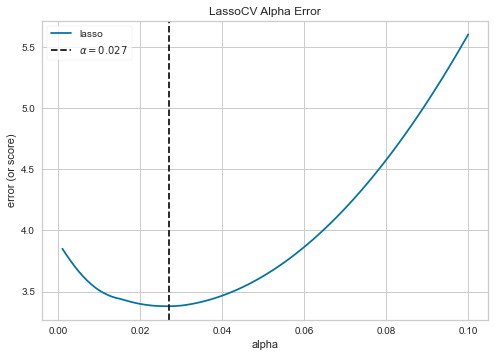

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [60]:
from yellowbrick.regressor import AlphaSelection

# Create a list of alphas to cross-validate against
alphas = np.linspace(0.001,.1,100)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

In [61]:
errors = {"train":[],"test":[]}
for alpha in np.linspace(0.001,.1,100):
    model = Lasso(alpha=alpha).fit(X_train_scaled, y_train)
    y_pred = model.predict(X_train_scaled)
    error = mean_squared_error(y_train,y_pred)
    errors["train"].append(error)
    
    y_pred = model.predict(X_test_scaled)
    error = mean_squared_error(y_test,y_pred)
    errors["test"].append(error)
errors    

{'train': [2.94465786122339,
  2.9474539280695997,
  2.9521012005205987,
  2.955421165849077,
  2.959497501299516,
  2.9644795075903327,
  2.9703671847215274,
  2.9771605326931003,
  2.984859551505052,
  2.993464241157381,
  3.0029746016500893,
  3.0133906329831754,
  3.0247123351566416,
  3.0369397081704834,
  3.050072752024705,
  3.064111466719304,
  3.075485841150288,
  3.0854513981890594,
  3.095986328706745,
  3.107090794574206,
  3.1174560258783575,
  3.1242617156754395,
  3.1313831128284417,
  3.1388209006228087,
  3.1465752191556997,
  3.1546460402122745,
  3.163033212946085,
  3.1717369011421335,
  3.180757104800421,
  3.190093823920946,
  3.19974705850371,
  3.209716808548713,
  3.2200030740559535,
  3.2306058550254324,
  3.241525151457151,
  3.2527609633511068,
  3.264313290707301,
  3.2761821335257335,
  3.2883674918064045,
  3.3008693655493144,
  3.313687754754462,
  3.3268226594218477,
  3.340274079551473,
  3.354042015143336,
  3.368126466197437,
  3.382527432713777,
  3

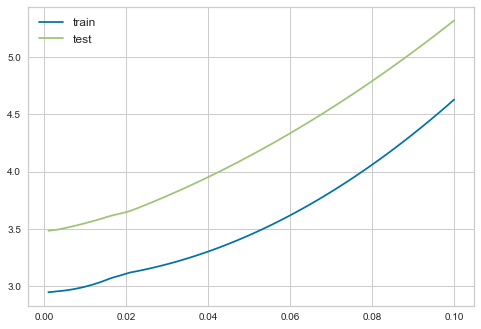

In [62]:
plt.plot(np.linspace(0.001,.1,100), errors["train"],label="train")
plt.plot(np.linspace(0.001,.1,100), errors["test"],label="test")
plt.legend(fontsize=12)
plt.show()

In [63]:
 len(errors["train"]) , len(errors["test"])

(100, 100)

## Elastic-Net 

In [64]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [65]:
el_model = ElasticNet().fit(X_train,y_train)
y_pred = el_model.predict(X_test)
eval_model(y_test,y_pred)

rmse:		2.098730303104542
mae:		1.4234255674689695
R2_score:	0.8087884906376239


In [66]:
el_model.score(X_train,y_train),el_model.score(X_test,y_test)

(0.8515544987549839, 0.8087884906376239)

In [67]:
el_model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [68]:
elcv_model = ElasticNetCV(alphas = np.linspace(.001,1,100), l1_ratio = [.1, .5, .7, .9, .95, .99, 1]).fit(X_train,y_train)

y_pred = elcv_model.predict(X_train)

elcv_model.score(X_train,y_train),elcv_model.score(X_test,y_test),elcv_model.get_params()

(0.8886301933636378,
 0.8492676810044625,
 {'alphas': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
         0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
         0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
         0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
         0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
         0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
         0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
         0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
         0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
         0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
         0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
         0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
         0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
         0.65690909, 0.667     , 0.67709091, 0.6871

In [69]:
# dir(elcv_model)
elcv_model.get_params()

{'alphas': array([0.001     , 0.01109091, 0.02118182, 0.03127273, 0.04136364,
        0.05145455, 0.06154545, 0.07163636, 0.08172727, 0.09181818,
        0.10190909, 0.112     , 0.12209091, 0.13218182, 0.14227273,
        0.15236364, 0.16245455, 0.17254545, 0.18263636, 0.19272727,
        0.20281818, 0.21290909, 0.223     , 0.23309091, 0.24318182,
        0.25327273, 0.26336364, 0.27345455, 0.28354545, 0.29363636,
        0.30372727, 0.31381818, 0.32390909, 0.334     , 0.34409091,
        0.35418182, 0.36427273, 0.37436364, 0.38445455, 0.39454545,
        0.40463636, 0.41472727, 0.42481818, 0.43490909, 0.445     ,
        0.45509091, 0.46518182, 0.47527273, 0.48536364, 0.49545455,
        0.50554545, 0.51563636, 0.52572727, 0.53581818, 0.54590909,
        0.556     , 0.56609091, 0.57618182, 0.58627273, 0.59636364,
        0.60645455, 0.61654545, 0.62663636, 0.63672727, 0.64681818,
        0.65690909, 0.667     , 0.67709091, 0.68718182, 0.69727273,
        0.70736364, 0.71745455, 0.7275

In [70]:
elcv_model.l1_ratio

[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
model = ElasticNet()
params = {"alpha":np.logspace(1,2,100), "l1_ratio":np.linspace(.01,1,50)}
gr_model = GridSearchCV(model, params)
gr_model.fit(X_train, y_train)


GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': array([ 10.        ,  10.23531022,  10.47615753,  10.72267222,
        10.97498765,  11.23324033,  11.49756995,  11.76811952,
        12.0450354 ,  12.32846739,  12.61856883,  12.91549665,
        13.21941148,  13.53047775,  13.84886371,  14.17474163,
        14.50828778,  14.84968262,  15.19911083,  15.55676144,
        15.92282793,  16.29750835,  16.68100537,  17.07352647,
        17.47528...
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])})

In [73]:
y_pred = gr_model.predict(X_test)
eval_model(y_test,y_pred),gr_model.best_score_, gr_model.best_params_

rmse:		2.3811150661557594
mae:		1.6902285765066887
R2_score:	0.7538717129890955


(None, 0.7980290959862499, {'alpha': 10.0, 'l1_ratio': 0.01})